# **Loading Images**

In [1]:
import zipfile
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
#path to zip file and extraction directory
zip_file_path = '/content/layouts.zip'
extraction_dir = '/content/E7-images'

# Extract zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List all extracted image file paths
image_files = [os.path.join(extraction_dir, file) for file in os.listdir(extraction_dir) if file.endswith('.png') or file.endswith('.jpg')]
# Load images into numpy arrays
images = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images.append(img)

print(f'Total images loaded: {len(images)}')

Total images loaded: 1183


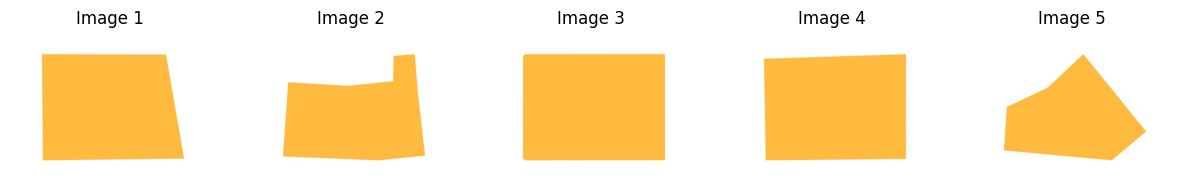

In [4]:
# Display a sample of images
def display_sample_images(image_files, sample_size=5):
    sample_files = image_files[:sample_size]
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img = cv2.imread(file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, sample_size, i+1)
        plt.imshow(img_rgb)
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()

# Display a sample of images
display_sample_images(image_files)

# **Detecting Duplicates Using Image Hashing**

In [5]:
def dhash(image, hash_size=8):
    resized = cv2.resize(image, (hash_size + 1, hash_size))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    diff = gray[:, 1:] > gray[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

def remove_duplicates(image_files):
    hashes = {}
    unique_images = []
    for file in image_files:
        image = cv2.imread(file)
        if image is None:
            continue
        h = dhash(image)
        hash_str = str(h)
        if hash_str not in hashes:
            hashes[hash_str] = file
            unique_images.append(file)

    return unique_images

# Remove duplicates
unique_image_files = remove_duplicates(image_files)
print(f'Total unique images: {len(unique_image_files)}')


Total unique images: 135


# **Feature Generation**

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

number_of_corners=[]
for i in range(len(unique_image_files)):
  img = cv2.imread(unique_image_files[i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  corners = cv2.goodFeaturesToTrack(gray, 27, 0.05, 10)
  corners = np.int0(corners)
  number_of_corners.append(corners.shape[0])

print("List having count of number of corners:",number_of_corners)

<ipython-input-6-eead7053eac0>:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


List having count of number of corners: [4, 6, 4, 4, 5, 4, 6, 4, 9, 8, 4, 10, 5, 10, 5, 7, 4, 5, 4, 4, 9, 4, 10, 8, 9, 5, 6, 4, 9, 6, 4, 4, 4, 4, 4, 20, 8, 8, 3, 7, 15, 6, 7, 9, 9, 8, 7, 5, 4, 4, 4, 6, 8, 8, 6, 5, 6, 5, 4, 14, 7, 12, 8, 8, 7, 7, 15, 5, 6, 4, 5, 4, 4, 7, 6, 5, 4, 6, 6, 7, 5, 4, 7, 6, 4, 4, 4, 7, 6, 6, 3, 6, 6, 4, 4, 10, 7, 6, 4, 4, 6, 6, 9, 8, 5, 6, 4, 9, 5, 6, 6, 4, 4, 4, 4, 10, 6, 4, 4, 8, 10, 4, 5, 5, 5, 4, 5, 7, 7, 13, 9, 8, 6, 4, 6]


In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

areas = []
perimeters = []
num_edges = []
mean_edge_lengths = []
std_edge_lengths = []
bounding_box_perimeters = []
bounding_box_areas = []
aspect_ratios = []
extent_ratios = []
compactness_values = []
hull_areas = []
interior_angle_count=[]
interior_angles_0_to_45_count=[]
interior_angles_45_to_135_count=[]
interior_angles_135_to_225_count=[]
for i in range(len(unique_image_files)):
  img = cv2.imread(unique_image_files[i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edges = cv2.Canny(blurred, 50, 150)
  contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:
      area = cv2.contourArea(contour)
      areas.append(area)

      perimeter = cv2.arcLength(contour, True)
      perimeters.append(perimeter)

      epsilon = 0.02 * cv2.arcLength(contour, True)
      approx = cv2.approxPolyDP(contour, epsilon, True)
      num_edges.append(len(approx))

      edge_lengths = []
      for i in range(len(approx)):
          pt1 = approx[i][0]
          pt2 = approx[(i + 1) % len(approx)][0]
          edge_length = np.linalg.norm(pt1 - pt2)
          edge_lengths.append(edge_length)
      mean_edge_length = np.mean(edge_lengths)
      mean_edge_lengths.append(mean_edge_length)

      std_edge_length = np.std(edge_lengths)
      std_edge_lengths.append(std_edge_length)

      x, y, w, h = cv2.boundingRect(contour)
      perimeter_bb = 2 * (w + h)
      bounding_box_perimeters.append(perimeter_bb)
      area_bb = w * h
      bounding_box_areas.append(area_bb)
      aspect_ratio = float(w) / h
      aspect_ratios.append(aspect_ratio)
      extent_ratio = area / area_bb
      extent_ratios.append(extent_ratio)
      compactness = (perimeter ** 2) / area
      compactness_values.append(compactness)

      hull = cv2.convexHull(contour)
      hull_area = cv2.contourArea(hull)
      hull_areas.append(hull_area)

      interior_angles = []
      interior_angles_0_to_45=[]
      interior_angles_45_to_135=[]
      interior_angles_135_to_225=[]
      for i in range(len(approx)):
          pt1 = approx[i % len(approx)][0]
          pt2 = approx[(i + 1) % len(approx)][0]
          pt3 = approx[(i + 2) % len(approx)][0]
          vec1 = np.array(pt1) - np.array(pt2)
          vec2 = np.array(pt3) - np.array(pt2)
          vec1_normalized = vec1 / np.linalg.norm(vec1)
          vec2_normalized = vec2 / np.linalg.norm(vec2)
          cos_angle = np.dot(vec1_normalized, vec2_normalized)
          angle_deg = np.degrees(np.arccos(cos_angle))
          interior_angles.append(angle_deg)
      interior_angle_count.append(len(interior_angles))

      for i in interior_angles:
        if i > 0 and i < 45:
          interior_angles_0_to_45.append(i)
        if i > 45 and i < 135:
          interior_angles_45_to_135.append(i)
        if i > 135 and i < 225:
          interior_angles_135_to_225.append(i)
      interior_angles_135_to_225_count.append(len(interior_angles_135_to_225))
      interior_angles_45_to_135_count.append(len(interior_angles_45_to_135))
      interior_angles_0_to_45_count.append(len(interior_angles_0_to_45))


print("Areas of detected regions:", areas)
print("Perimeters of detected regions:", perimeters)
print("Number of edges of detected regions:", num_edges)
print("Mean edge lengths of detected regions:", mean_edge_lengths)
print("Standard deviations of edge lengths of detected regions:", std_edge_lengths)
print("Perimeters of bounding boxes of detected regions:", bounding_box_perimeters)
print("Areas of bounding boxes of detected regions:", bounding_box_areas)
print("Aspect ratios of bounding boxes of detected regions:", aspect_ratios)
print("Extent ratios of detected regions:", extent_ratios)
print("Compactness of detected regions:", compactness_values)
print("Areas of convex hulls of detected regions:", hull_areas)
print("Interior angles for each contour:",interior_angle_count )
print("No. of interior angles between 0-45:",interior_angles_0_to_45_count )
print("No. of interior angles between 45-135:",interior_angles_45_to_135_count )
print("No. of interior angles between 135-225:",interior_angles_135_to_225_count )

Areas of detected regions: [141319.5, 108952.0, 152970.0, 147703.5, 92003.0, 127008.0, 137159.0, 134492.0, 105250.5, 133949.0, 138229.5, 106150.5, 121178.0, 124038.0, 99429.0, 109130.0, 151869.5, 141900.5, 111241.0, 98808.5, 128844.0, 130784.0, 91502.0, 120146.5, 129163.0, 108810.5, 136897.0, 152773.5, 107673.5, 105911.0, 144941.0, 145378.5, 146632.0, 149168.0, 112198.5, 27.0, 183.5, 107432.0, 76836.0, 142908.0, 72173.0, 128222.0, 129665.0, 84844.0, 104243.0, 131877.0, 139879.0, 114912.5, 146661.5, 147922.0, 119772.5, 108369.5, 96707.0, 113335.0, 141448.5, 103691.5, 104861.0, 140132.0, 150231.5, 143.5, 125439.0, 104041.5, 100929.0, 109452.5, 127571.5, 94408.5, 268.0, 99294.5, 108040.5, 130234.5, 108523.5, 148455.5, 121813.5, 100601.5, 108951.5, 127308.0, 146806.0, 119042.5, 82043.5, 125274.5, 143478.5, 146157.5, 102391.0, 111251.0, 150431.0, 135816.5, 103023.0, 101009.0, 107422.5, 151235.5, 76797.0, 134725.0, 112784.0, 137223.5, 147541.5, 72279.0, 123347.0, 133830.5, 144935.5, 149992.0

# **Creating Dataframe**

In [8]:
import pandas as pd

# Create a dictionary with your lists
data = {
    'Unique Images': unique_image_files,
    'Number of Corners': number_of_corners,
    'Area': areas,
    'Perimeter': perimeters,
    'Number of Edges': num_edges,
    'Mean Edge Length': mean_edge_lengths,
    'Standard Deviation': std_edge_lengths,
    'Bounding Box Perimeter': bounding_box_perimeters,
    'Bounding Box Area': bounding_box_areas,
    'Aspect Ratio': aspect_ratios,
    'Extent Ratio': extent_ratios,
    'Compactness Value': compactness_values,
    'Hull Area': hull_areas,
    'Number of Interior Angles': interior_angle_count,
    'Angles between 0-45': interior_angles_0_to_45_count,
    'Angles between 45-135': interior_angles_45_to_135_count,
    'Angles between 135-225': interior_angles_135_to_225_count,
    }

# Create a dataframe
df = pd.DataFrame(data)

df.set_index('Unique Images', inplace=True)

# Display the dataframe
df


,Number of Corners,Area,Perimeter,Number of Edges,Mean Edge Length,Standard Deviation,Bounding Box Perimeter,Bounding Box Area,Aspect Ratio,Extent Ratio,Compactness Value,Hull Area,Number of Interior Angles,Angles between 0-45,Angles between 45-135,Angles between 135-225
Unique Images,,,,,,,,,,,,,,,,
/content/E7-images/0322.jpg,4,141319.5,1541.722870,4,378.480402,47.229072,1584,153567,1.336283,0.920247,16.819401,141976.5,4,0,4,0
/content/E7-images/0380.jpg,6,108952.0,1534.877198,6,248.075907,138.369111,1586,153906,1.339233,0.707913,21.622806,125377.0,6,0,6,0
/content/E7-images/0999.jpg,4,152970.0,1573.112698,4,391.016369,57.551706,1586,153906,1.339233,0.993918,16.177574,153042.5,4,0,4,0
/content/E7-images/0350.jpg,4,147703.5,1564.669047,4,387.818499,60.928742,1586,153906,1.339233,0.959699,16.575025,148315.5,4,0,4,0
/content/E7-images/0359.jpg,5,92003.0,1285.449918,5,246.624849,89.854235,1580,152661,1.344214,0.602662,17.960083,95879.0,5,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/E7-images/0687.jpg,9,126070.0,1525.303604,7,208.247336,111.326629,1584,153452,1.343195,0.821560,18.454439,135525.5,7,0,6,1
/content/E7-images/0433.jpg,8,86621.5,1389.501647,4,324.728685,181.816614,1582,153114,1.340237,0.565732,22.289095,87483.0,4,1,3,0
/content/E7-images/0142.jpg,6,112439.5,1475.085348,6,235.025243,111.650356,1582,153114,1.340237,0.734352,19.351534,119244.5,6,0,6,0


# **Analysing Collinearity and Multicollinearity**

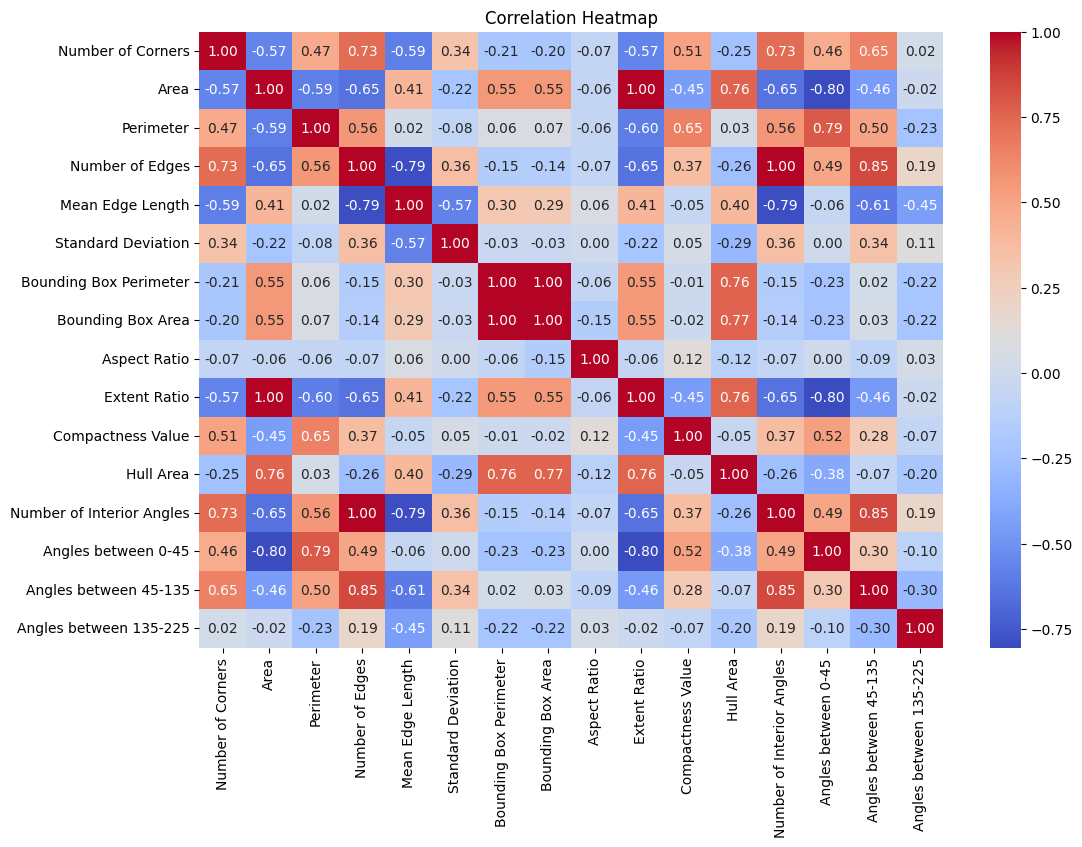

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop non-numeric columns for VIF calculation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

# Display VIF values
vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Number of Corners,2.109906e+01
1,Area,5.566088e+06
2,Perimeter,1.053395e+03
3,Number of Edges,inf
4,Mean Edge Length,6.959218e+02
5,Standard Deviation,2.362837e+01
6,Bounding Box Perimeter,3.641525e+07
7,Bounding Box Area,2.857423e+07
8,Aspect Ratio,8.293060e+05
9,Extent Ratio,5.584648e+06


In [11]:
df=df.drop(columns=['Number of Edges','Number of Interior Angles','Angles between 0-45','Angles between 45-135','Angles between 135-225'])
df

,Number of Corners,Area,Perimeter,Mean Edge Length,Standard Deviation,Bounding Box Perimeter,Bounding Box Area,Aspect Ratio,Extent Ratio,Compactness Value,Hull Area
Unique Images,,,,,,,,,,,
/content/E7-images/0322.jpg,4,141319.5,1541.722870,378.480402,47.229072,1584,153567,1.336283,0.920247,16.819401,141976.5
/content/E7-images/0380.jpg,6,108952.0,1534.877198,248.075907,138.369111,1586,153906,1.339233,0.707913,21.622806,125377.0
/content/E7-images/0999.jpg,4,152970.0,1573.112698,391.016369,57.551706,1586,153906,1.339233,0.993918,16.177574,153042.5
/content/E7-images/0350.jpg,4,147703.5,1564.669047,387.818499,60.928742,1586,153906,1.339233,0.959699,16.575025,148315.5
/content/E7-images/0359.jpg,5,92003.0,1285.449918,246.624849,89.854235,1580,152661,1.344214,0.602662,17.960083,95879.0
...,...,...,...,...,...,...,...,...,...,...,...
/content/E7-images/0687.jpg,9,126070.0,1525.303604,208.247336,111.326629,1584,153452,1.343195,0.821560,18.454439,135525.5
/content/E7-images/0433.jpg,8,86621.5,1389.501647,324.728685,181.816614,1582,153114,1.340237,0.565732,22.289095,87483.0
/content/E7-images/0142.jpg,6,112439.5,1475.085348,235.025243,111.650356,1582,153114,1.340237,0.734352,19.351534,119244.5


# **Clustering**

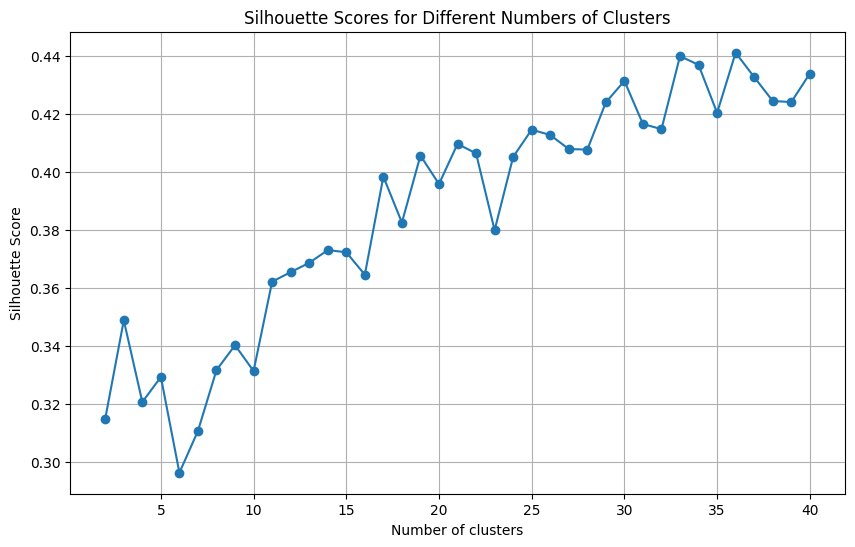

Optimal number of clusters based on Silhouette Score: 36
Optimal number of clusters: 36
Cluster sizes: [ 1 26  6  6  1  1 11  2  2  6  5  3  4  2  4  4  2  1  1  2  2  6  4  1
  4  5  2  2  4  2  2  1  6  1  2  1]


In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



# Drop non-numeric columns if there are any, assuming numeric_data is necessary for clustering
numeric_data = df.select_dtypes(include=[np.number])

# Standardize the data for better performance with KMeans
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Use Silhouette Score to determine the optimal number of clusters
silhouette_scores = []
range_n_clusters = range(2, 41)  # Testing for 2 to 40 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal number of clusters based on the highest Silhouette Score
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_clusters}')

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Print the final number of clusters and their sizes
num_clusters = len(set(clusters))
print(f'Optimal number of clusters: {num_clusters}')

# Show the size of each cluster
cluster_sizes = np.bincount(clusters)
print(f'Cluster sizes: {cluster_sizes}')





In [13]:
df['cluster_label'] = df['Cluster'].apply(lambda x: f'Cluster_{x}')
df

,Number of Corners,Area,Perimeter,Mean Edge Length,Standard Deviation,Bounding Box Perimeter,Bounding Box Area,Aspect Ratio,Extent Ratio,Compactness Value,Hull Area,Cluster,cluster_label
Unique Images,,,,,,,,,,,,,
/content/E7-images/0322.jpg,4,141319.5,1541.722870,378.480402,47.229072,1584,153567,1.336283,0.920247,16.819401,141976.5,22,Cluster_22
/content/E7-images/0380.jpg,6,108952.0,1534.877198,248.075907,138.369111,1586,153906,1.339233,0.707913,21.622806,125377.0,27,Cluster_27
/content/E7-images/0999.jpg,4,152970.0,1573.112698,391.016369,57.551706,1586,153906,1.339233,0.993918,16.177574,153042.5,1,Cluster_1
/content/E7-images/0350.jpg,4,147703.5,1564.669047,387.818499,60.928742,1586,153906,1.339233,0.959699,16.575025,148315.5,1,Cluster_1
/content/E7-images/0359.jpg,5,92003.0,1285.449918,246.624849,89.854235,1580,152661,1.344214,0.602662,17.960083,95879.0,26,Cluster_26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/E7-images/0687.jpg,9,126070.0,1525.303604,208.247336,111.326629,1584,153452,1.343195,0.821560,18.454439,135525.5,12,Cluster_12
/content/E7-images/0433.jpg,8,86621.5,1389.501647,324.728685,181.816614,1582,153114,1.340237,0.565732,22.289095,87483.0,33,Cluster_33
/content/E7-images/0142.jpg,6,112439.5,1475.085348,235.025243,111.650356,1582,153114,1.340237,0.734352,19.351534,119244.5,32,Cluster_32


Displaying images for cluster: Cluster_0


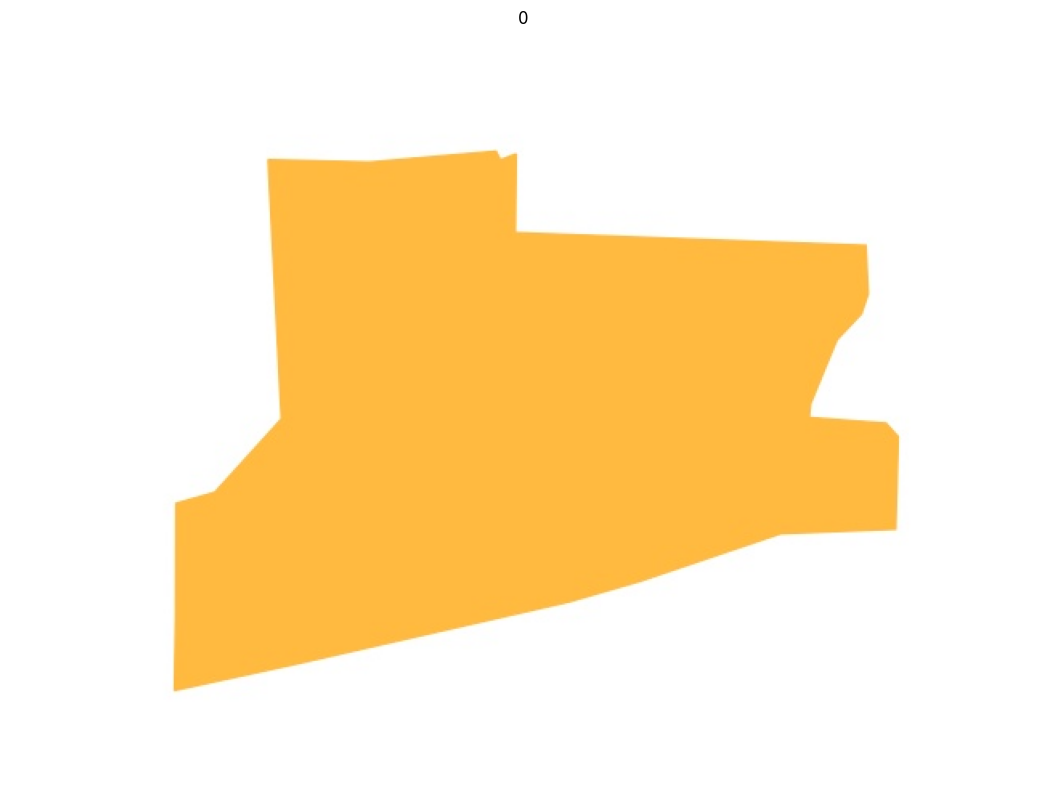

Displaying images for cluster: Cluster_1


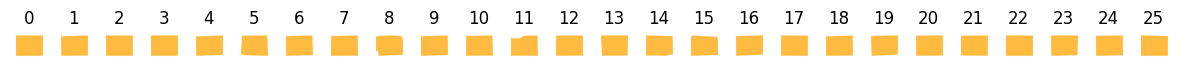

Displaying images for cluster: Cluster_10


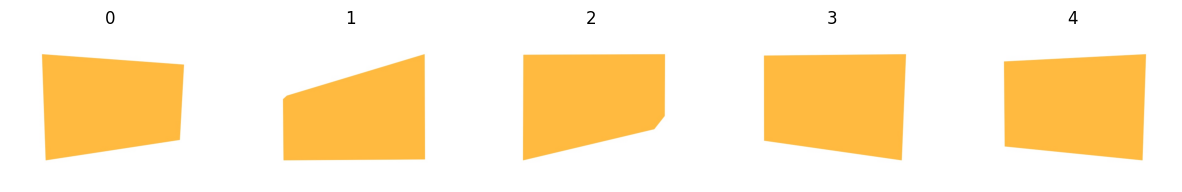

Displaying images for cluster: Cluster_11


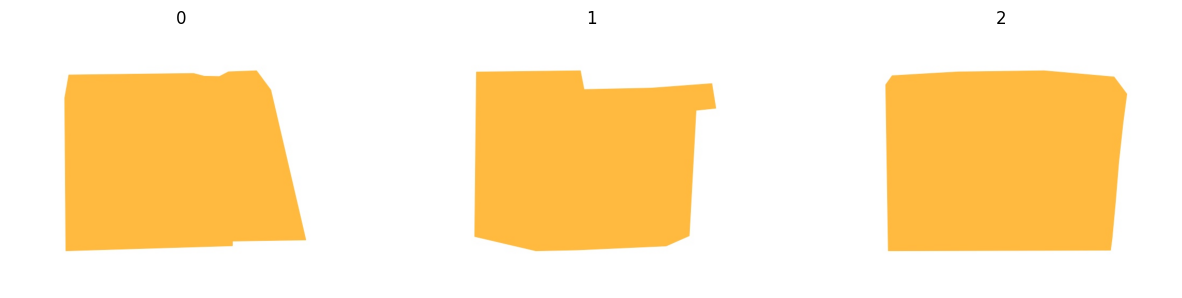

Displaying images for cluster: Cluster_12


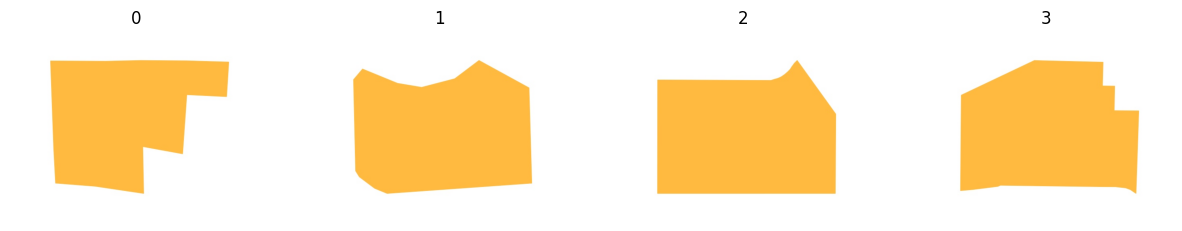

Displaying images for cluster: Cluster_13


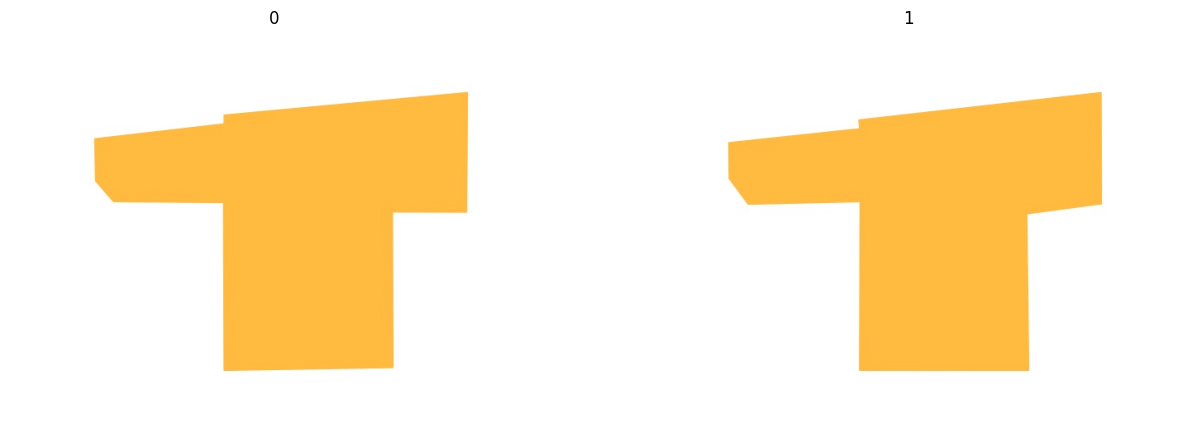

Displaying images for cluster: Cluster_14


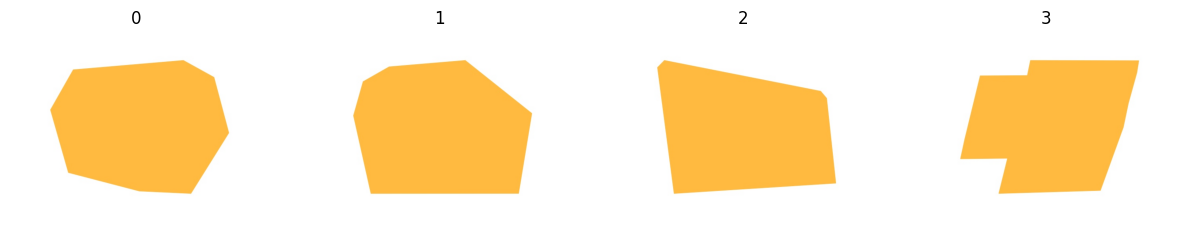

Displaying images for cluster: Cluster_15


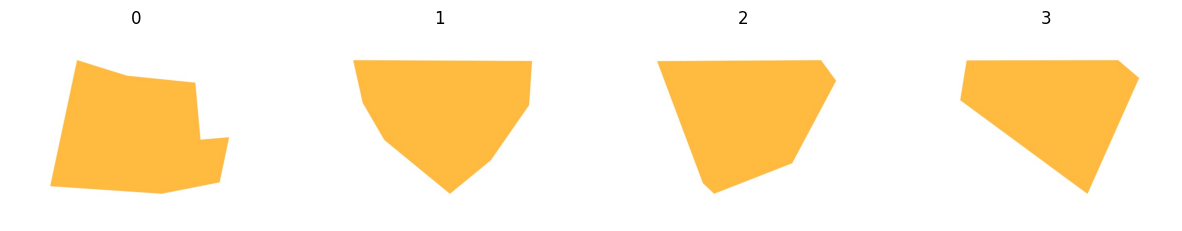

Displaying images for cluster: Cluster_16


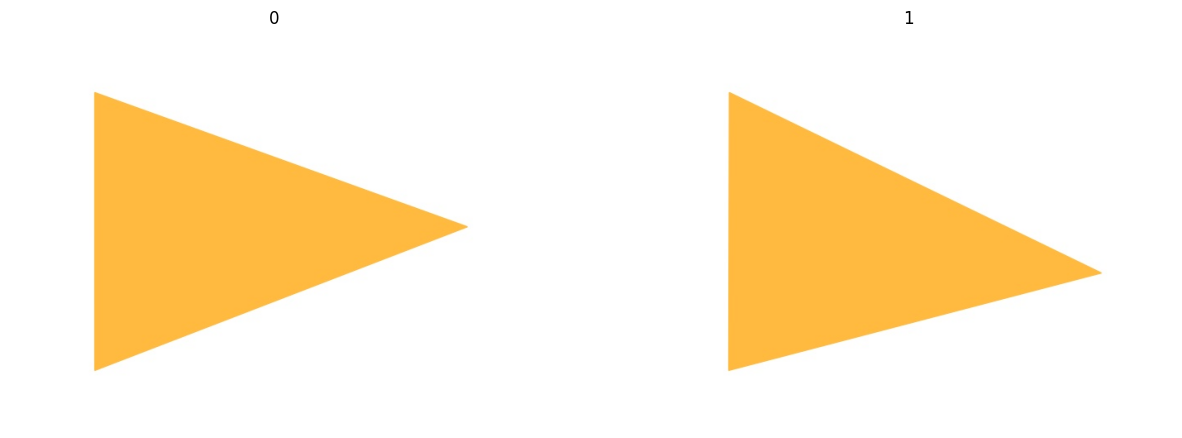

Displaying images for cluster: Cluster_17


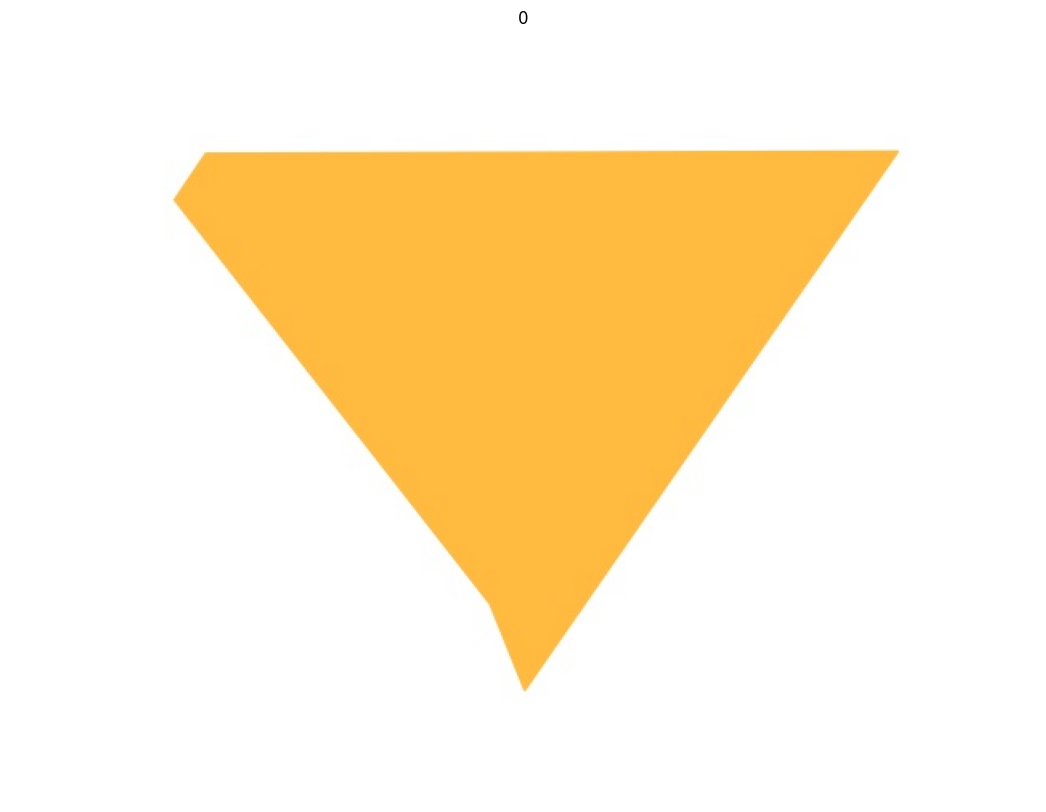

Displaying images for cluster: Cluster_18


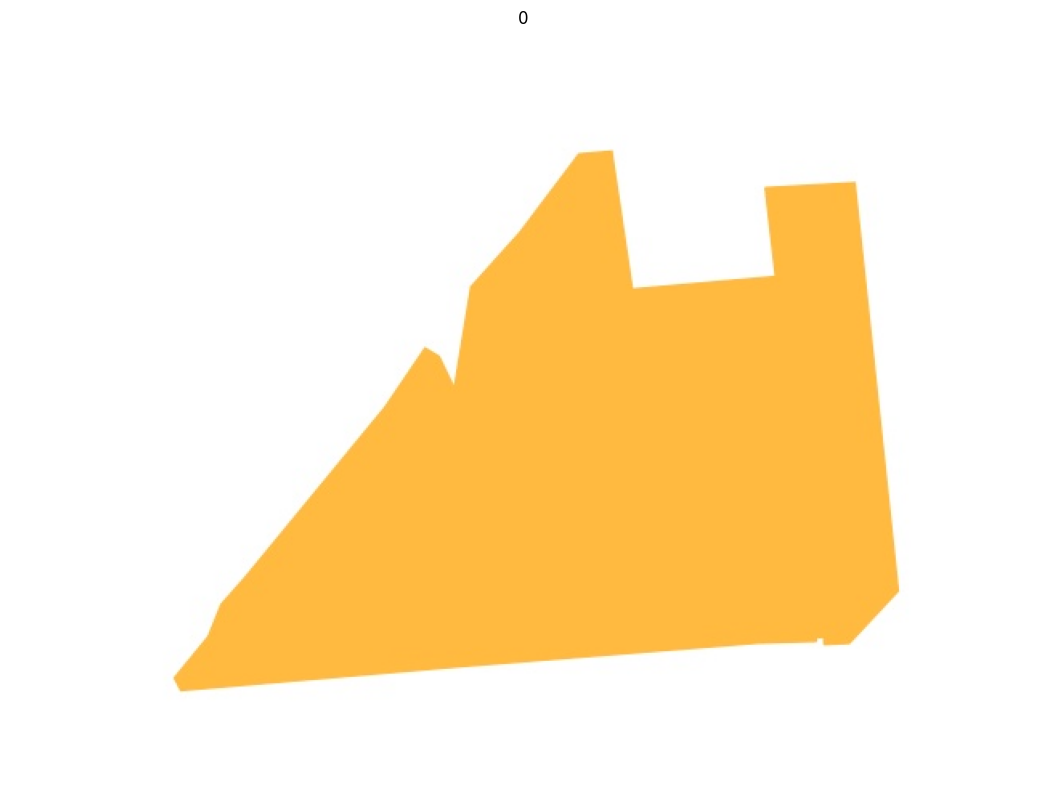

Displaying images for cluster: Cluster_19


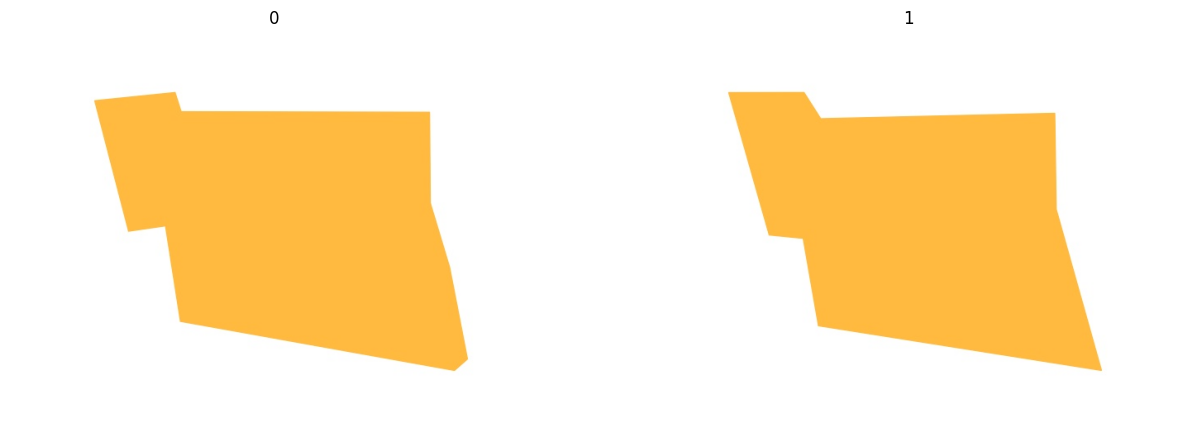

Displaying images for cluster: Cluster_2


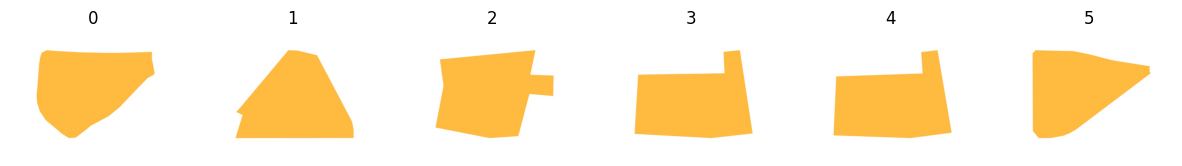

Displaying images for cluster: Cluster_20


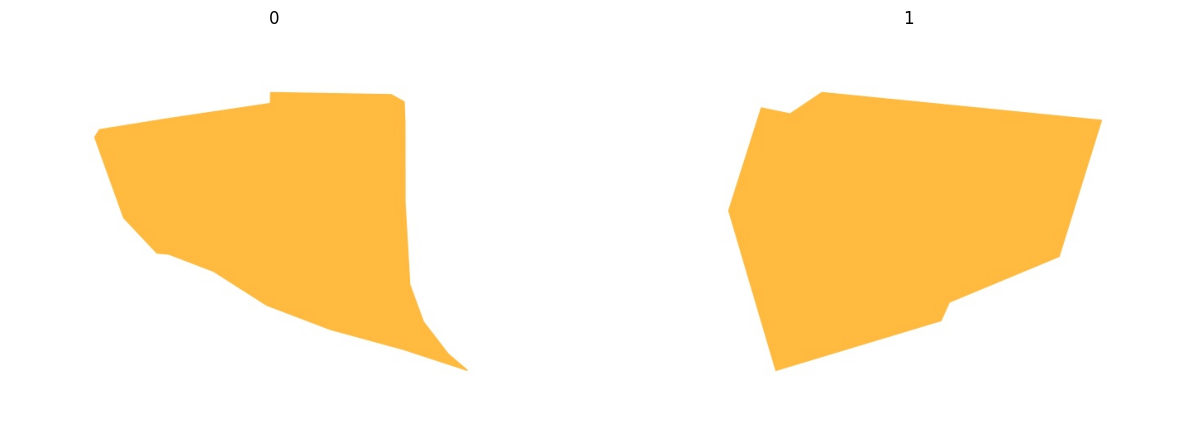

Displaying images for cluster: Cluster_21


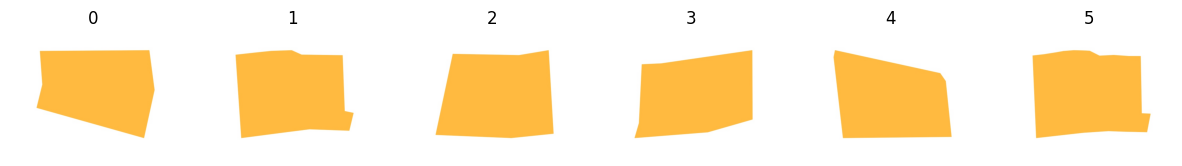

Displaying images for cluster: Cluster_22


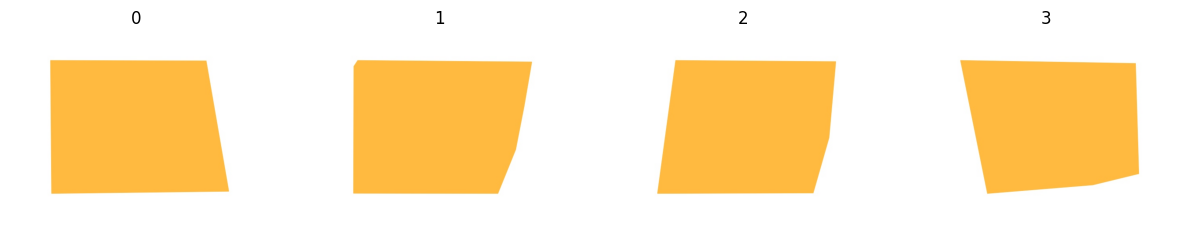

Displaying images for cluster: Cluster_23


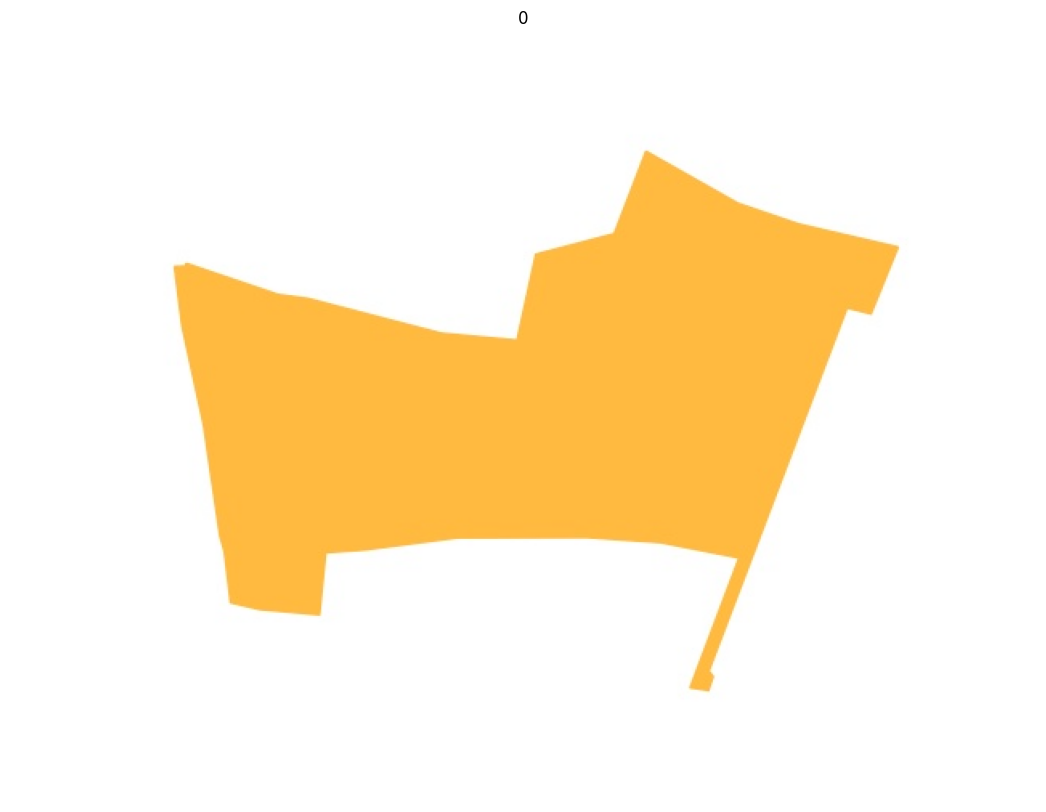

Displaying images for cluster: Cluster_24


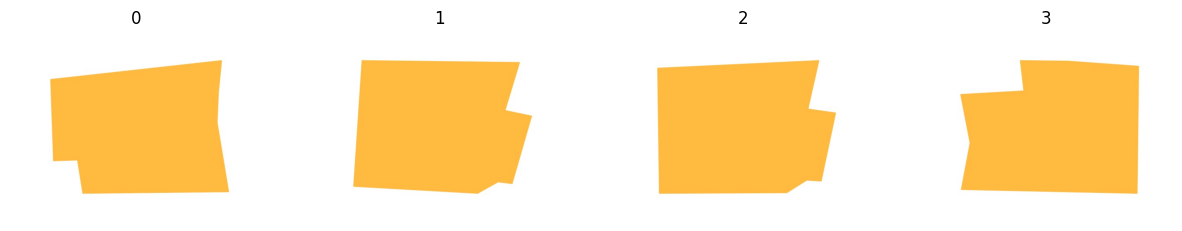

Displaying images for cluster: Cluster_25


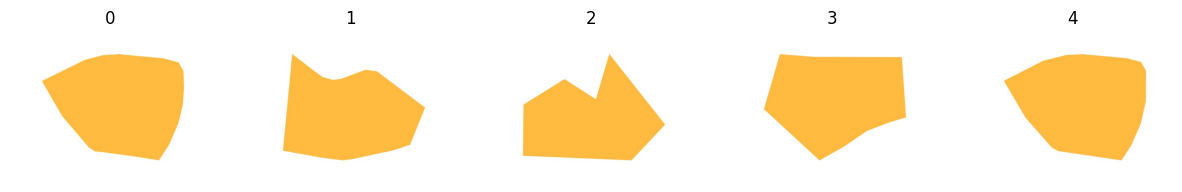

Displaying images for cluster: Cluster_26


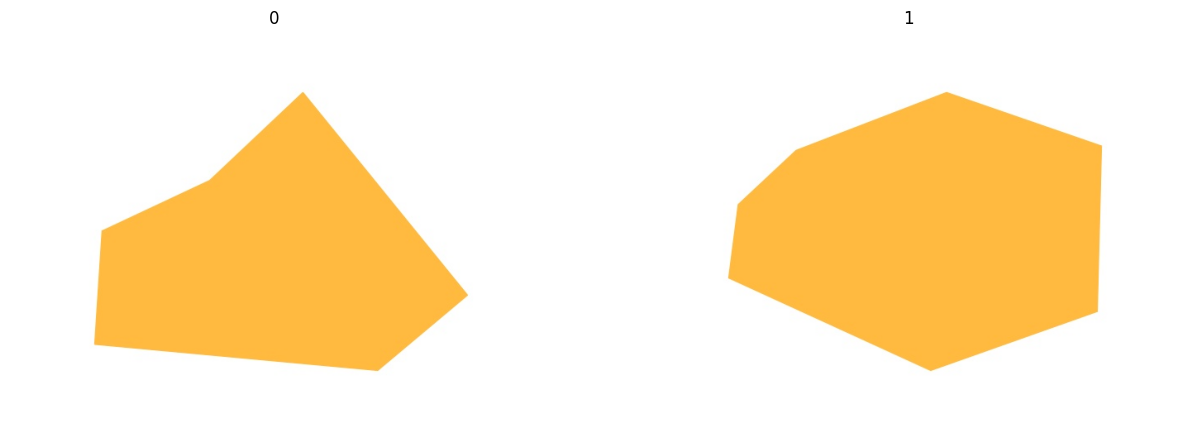

Displaying images for cluster: Cluster_27


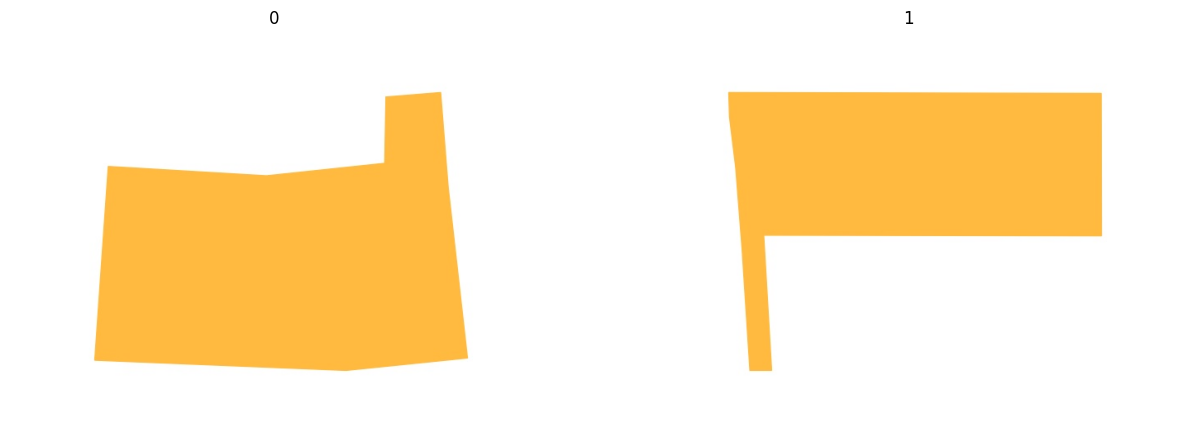

Displaying images for cluster: Cluster_28


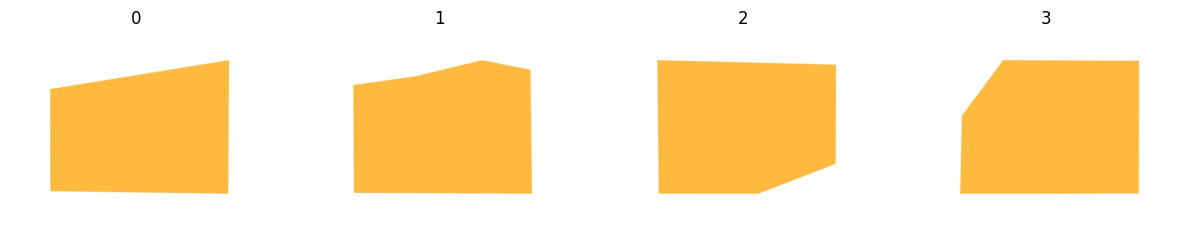

Displaying images for cluster: Cluster_29


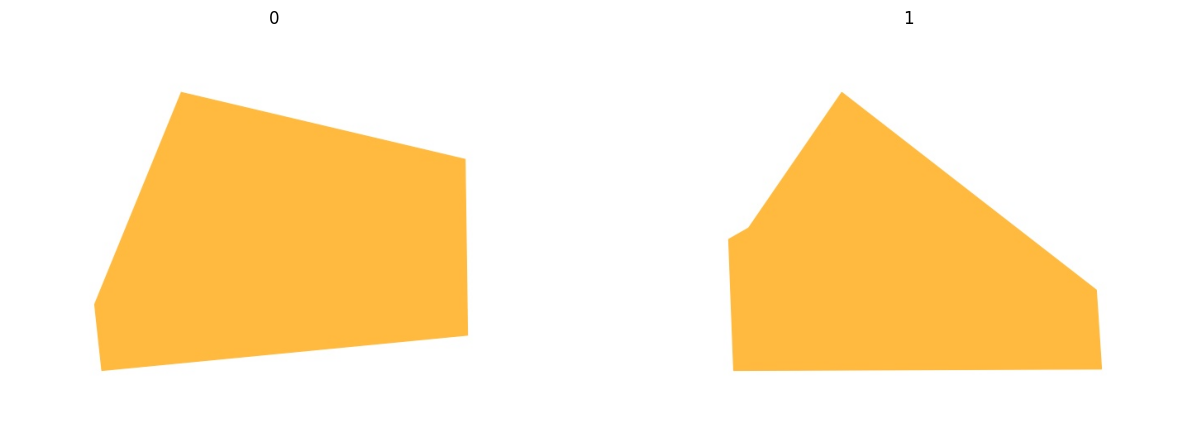

Displaying images for cluster: Cluster_3


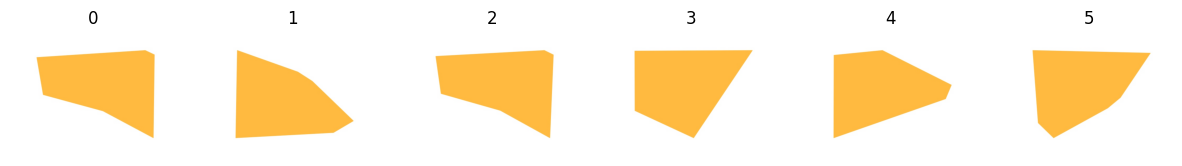

Displaying images for cluster: Cluster_30


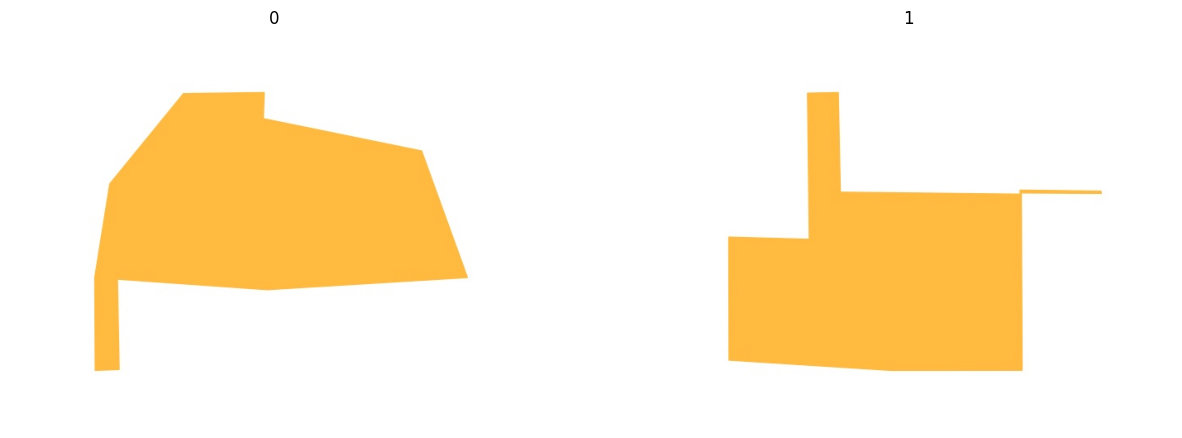

Displaying images for cluster: Cluster_31


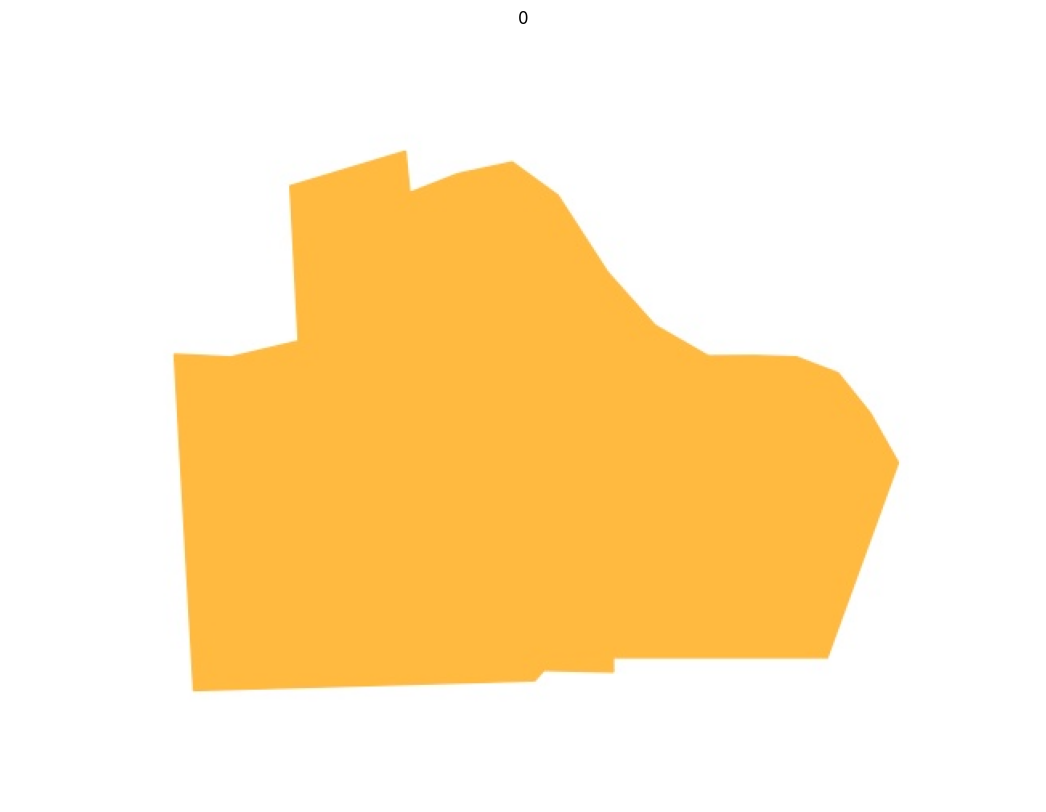

Displaying images for cluster: Cluster_32


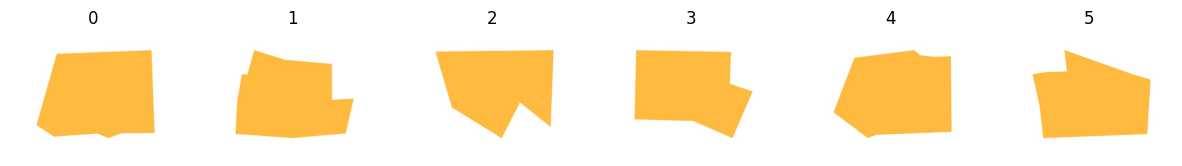

Displaying images for cluster: Cluster_33


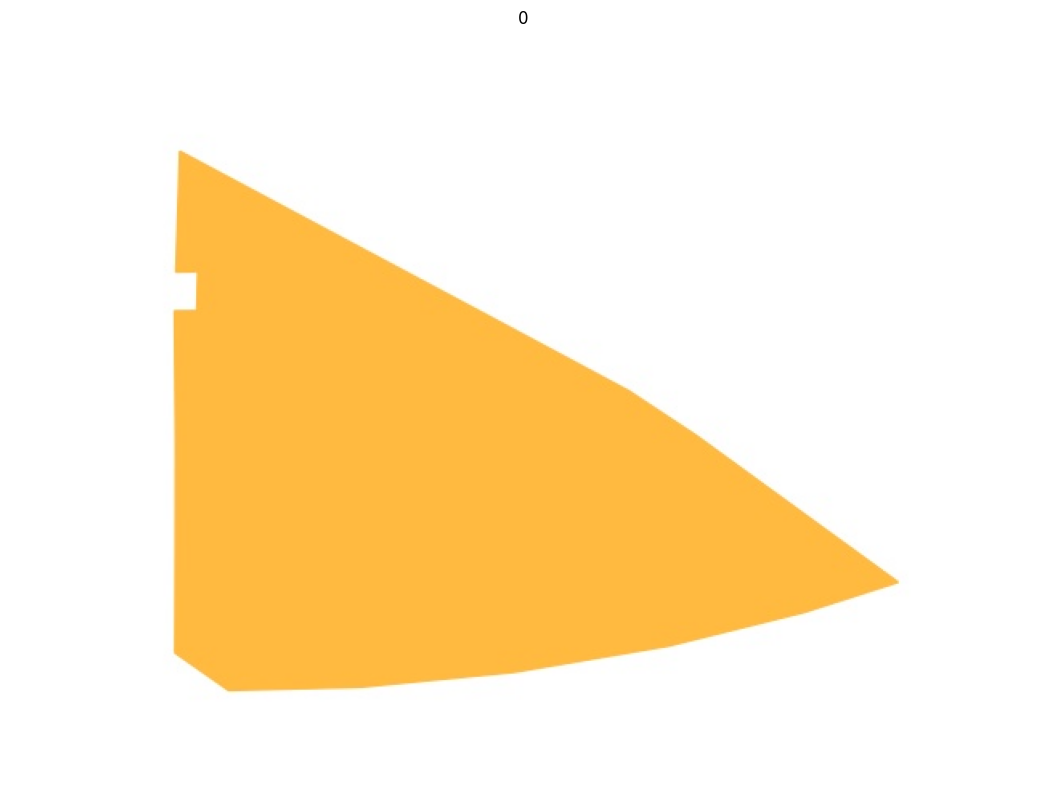

Displaying images for cluster: Cluster_34


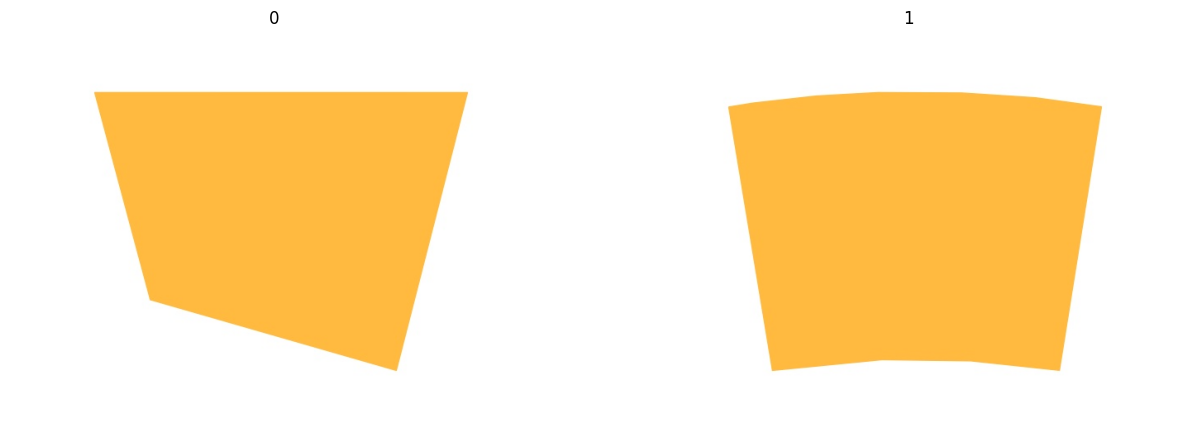

Displaying images for cluster: Cluster_35


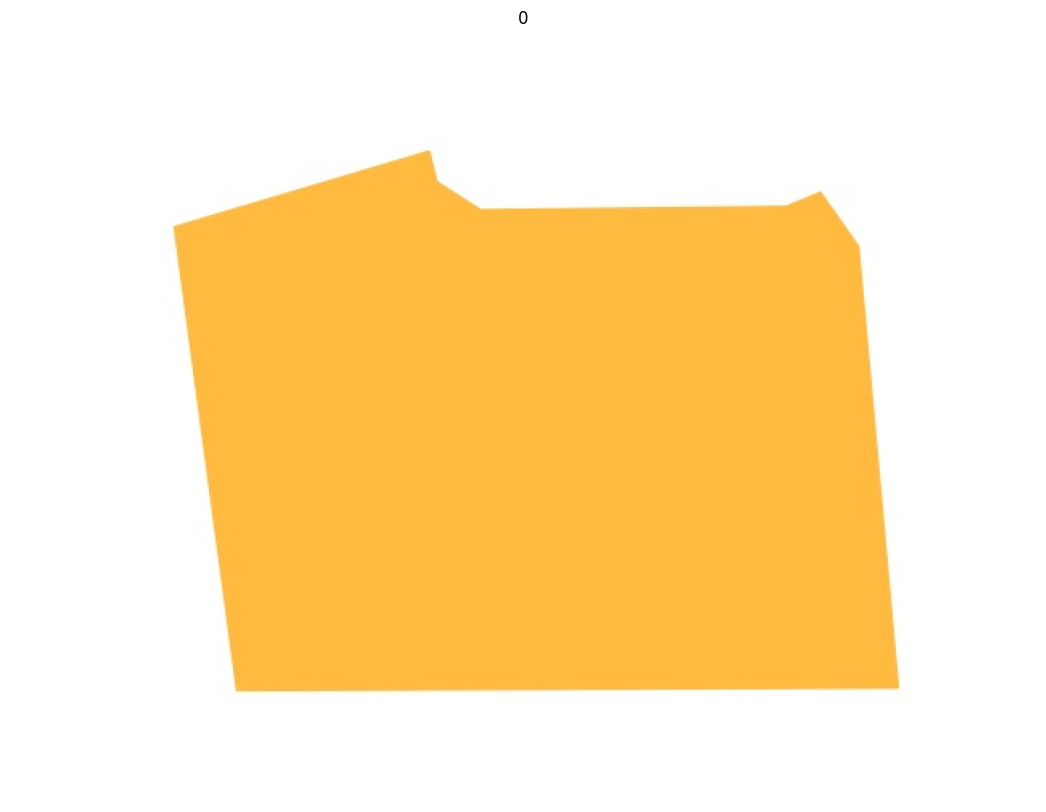

Displaying images for cluster: Cluster_4


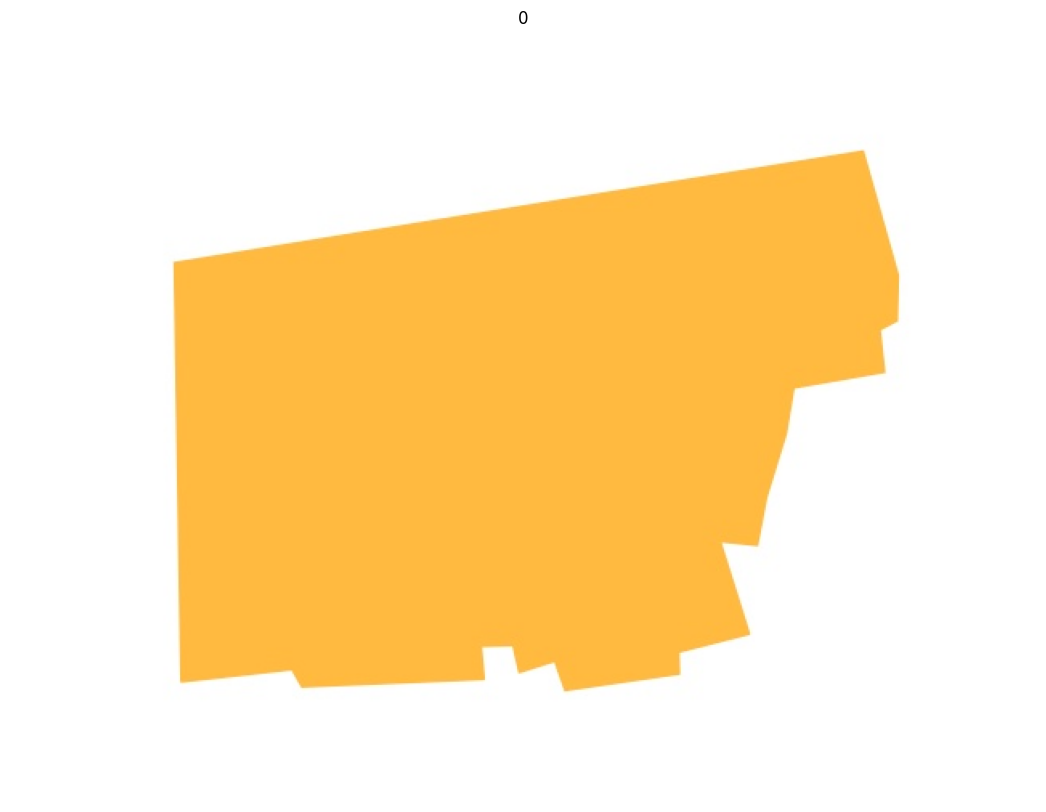

Displaying images for cluster: Cluster_5


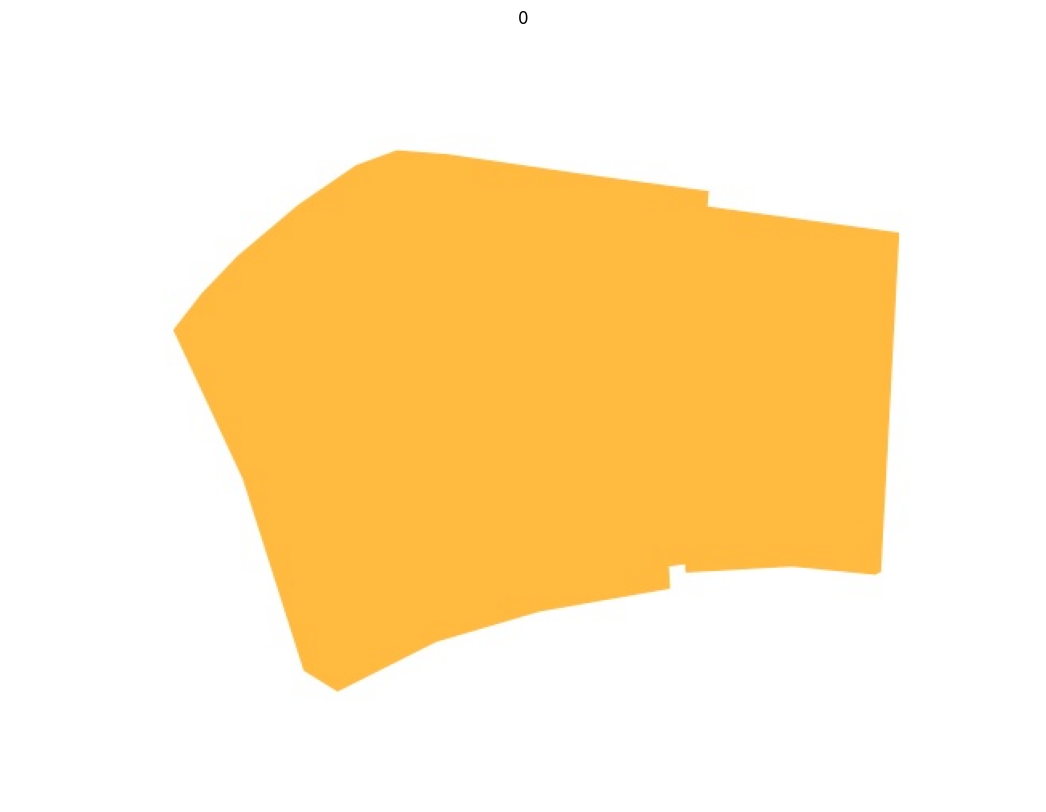

Displaying images for cluster: Cluster_6


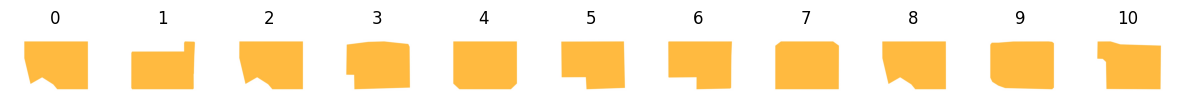

Displaying images for cluster: Cluster_7


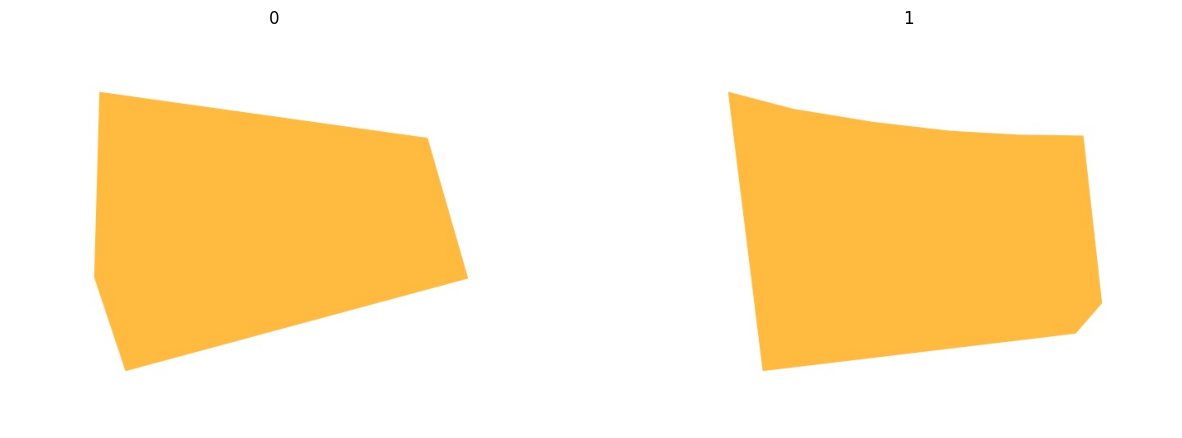

Displaying images for cluster: Cluster_8


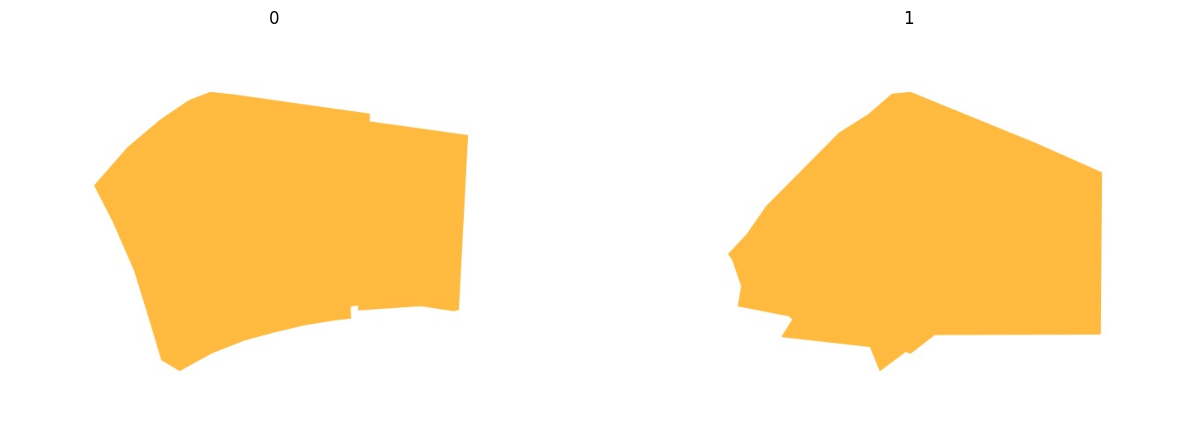

Displaying images for cluster: Cluster_9


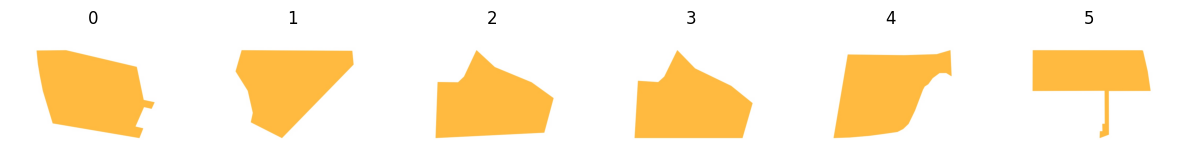

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(image_paths):
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(image_paths):
        image = Image.open(path)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f'{i}')
    plt.show()


# Group images by cluster_label and display them
for cluster_label, group in df.groupby('cluster_label'):
    image_paths = group.index.tolist()  # Get list of image paths for current cluster
    print(f"Displaying images for cluster: {cluster_label}")
    display_images(image_paths)


# **Labelling Complexity**

In [15]:
unique_corners = df['Number of Corners'].unique()
print(sorted(unique_corners))

[3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 20]


In [16]:
# Function to classify complexity based on number of corners
def classify_complexity(num_corners):
    if num_corners <= 5:
        return 'Low Complexity'
    elif num_corners <= 7:
        return 'Medium Complexity'
    else:
        return 'High Complexity'

# Apply classification function to each row and create a new column 'Complexity'
df['Complexity'] = df['Number of Corners'].apply(classify_complexity)

# Show dataframe
df



,Number of Corners,Area,Perimeter,Mean Edge Length,Standard Deviation,Bounding Box Perimeter,Bounding Box Area,Aspect Ratio,Extent Ratio,Compactness Value,Hull Area,Cluster,cluster_label,Complexity
Unique Images,,,,,,,,,,,,,,
/content/E7-images/0322.jpg,4,141319.5,1541.722870,378.480402,47.229072,1584,153567,1.336283,0.920247,16.819401,141976.5,22,Cluster_22,Low Complexity
/content/E7-images/0380.jpg,6,108952.0,1534.877198,248.075907,138.369111,1586,153906,1.339233,0.707913,21.622806,125377.0,27,Cluster_27,Medium Complexity
/content/E7-images/0999.jpg,4,152970.0,1573.112698,391.016369,57.551706,1586,153906,1.339233,0.993918,16.177574,153042.5,1,Cluster_1,Low Complexity
/content/E7-images/0350.jpg,4,147703.5,1564.669047,387.818499,60.928742,1586,153906,1.339233,0.959699,16.575025,148315.5,1,Cluster_1,Low Complexity
/content/E7-images/0359.jpg,5,92003.0,1285.449918,246.624849,89.854235,1580,152661,1.344214,0.602662,17.960083,95879.0,26,Cluster_26,Low Complexity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/E7-images/0687.jpg,9,126070.0,1525.303604,208.247336,111.326629,1584,153452,1.343195,0.821560,18.454439,135525.5,12,Cluster_12,High Complexity
/content/E7-images/0433.jpg,8,86621.5,1389.501647,324.728685,181.816614,1582,153114,1.340237,0.565732,22.289095,87483.0,33,Cluster_33,High Complexity
/content/E7-images/0142.jpg,6,112439.5,1475.085348,235.025243,111.650356,1582,153114,1.340237,0.734352,19.351534,119244.5,32,Cluster_32,Medium Complexity


Displaying images for complexity: High Complexity


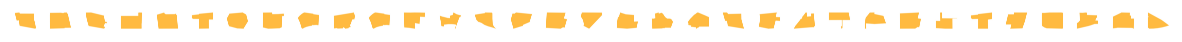

Displaying images for complexity: Low Complexity


Displaying images for complexity: Medium Complexity


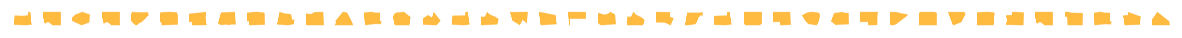

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images
def display_images(image_paths, complexity):
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(image_paths):
        image = Image.open(path)
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Group images by 'Complexity' and display them
for complexity, group in df.groupby('Complexity'):
    image_paths = group.index.tolist()  # Get list of image paths for current complexity
    print(f"Displaying images for complexity: {complexity}")
    display_images(image_paths, complexity)


# **Model Accuracy**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np


# Define features and target
features = df.drop(columns=['Cluster','cluster_label', 'Complexity'])  # Drop target and non-numeric columns
target = df['Cluster']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


num_clusters = len(np.unique(target))

# Perform K-means clustering on the training set
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the training set and the test set
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Map predicted cluster labels to the actual cluster labels
# This is necessary because K-means assigns arbitrary cluster numbers
# We need to map these to the actual cluster labels based on the training set
label_mapping = {}
for i in range(num_clusters):
    mask = (train_clusters == i)
    label_mapping[i] = y_train[mask].mode()[0]  # Find the most common actual label for each cluster

# Map the predicted cluster labels to the actual labels for the test set
y_pred = np.array([label_mapping[cluster] for cluster in test_clusters])

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')


Accuracy of the model: 0.89
